In [1]:
import twint
import time
import pandas as pd
import re
import nltk 
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import sys
import os
import string
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline

In [2]:
import nest_asyncio
nest_asyncio.apply()

In [3]:
df = pd.read_csv('CleanArsenal.csv', sep='\t')
df.head

<bound method NDFrame.head of        Unnamed: 0         username  \
0               0      norudreamer   
1               1         sw6billy   
2               2  telemundosports   
3               3      tom_yates91   
4               4       lcfcvrp342   
...           ...              ...   
40643       40643   _hasnaingulzar   
40644       40644   turiminvanthat   
40645       40645           luuk96   
40646       40646   robertnelson82   
40647       40647         mdymemes   

                                                   tweet  likes_count  \
0      @BarakaDavid20 Wear that Arsenal shirt with bl...            0   
1      Imagine West Ham win a European cup before Ars...            0   
2      SÁBADO de @premierleague 🦁  ⚽️ Aston Villa 🟣🔵 ...            0   
3      @CFNKingSpeedy @FozWrestle @SCJohnson @TheF2 @...            0   
4      @lcfcgeorgee Very good We can win against good...            0   
...                                                  ...          ...   
40

In [4]:
df.columns

Index(['Unnamed: 0', 'username', 'tweet', 'likes_count', 'retweets_count'], dtype='object')

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hishammohamedabdelaal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['stopwords']].head()

,stopwords
0,3
1,3
2,0
3,7
4,5


In [7]:
def cleanHtml(sentence): #function to clear html points
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r' ',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/|_|-]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def keepAlpha(sentence): #function to keep only alpha value
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent


def decontraction(text):         #Decontractions
    #specific Decontractions
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)

    #general Decontractions
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    
    return text

In [8]:
df['tweet'] = df['tweet'].str.lower()
df['tweet'] = df['tweet'].apply(cleanHtml)
df['tweet'] = df['tweet'].apply(cleanPunc)
df['tweet'] = df['tweet'].apply(keepAlpha)
df['tweet'] = df['tweet'].apply(decontraction)

In [9]:
from nltk.corpus import stopwords
stop_words = list(set(stopwords.words('english')))
len(stop_words)

179

In [10]:
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

In [11]:
df['tweet'] = df['tweet'].apply(removeStopWords)
df.head()

,Unnamed: 0,username,tweet,likes_count,retweets_count,stopwords
0,0,norudreamer,barakadavid wear arsenal shirt black pale ...,0,0,3
1,1,sw6billy,imagine west ham win european cup arsenal s...,0,0,3
2,2,telemundosports,bado de premierleague aston villa vs a...,0,0,0
3,3,tom_yates91,cfnkingspeedy fozwrestle scjohnson thef l...,0,0,7
4,4,lcfcvrp342,lcfcgeorgee good win good teams like liver...,0,0,5


In [12]:
words_to_exclude = ["https", "arsenal", "think"]

def create_wordcloud(text):
    #mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    cleaned_word = " ".join([word for word in text.split()
                            if all(ele not in word for ele in words_to_exclude)
                                and not word.startswith('@')
                                and word != 'RT'])
    wc = WordCloud(
    #mask = mask,
    max_words=3000,
    min_word_length =3,
    collocation_threshold = 20,
    stopwords=stopwords,
    repeat=True)
    wc.generate(cleaned_word)
    
    return wc


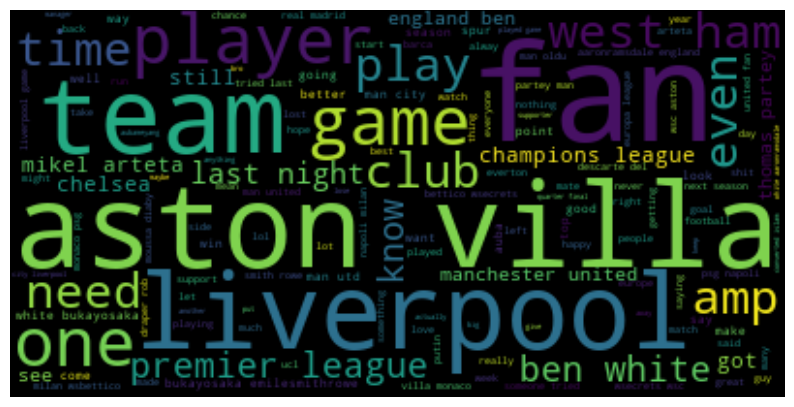

In [30]:
wordcloud =  create_wordcloud(' '.join(df['tweet']))
fig = plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [14]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer


In [15]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

In [16]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hishammohamedabdelaal/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
positive = 0
negative = 0
neutral = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for i in range(df.shape[0]):
 
    #print(tweet.text)
    tweet_list.append(df.tweet[i])
    score = SentimentIntensityAnalyzer().polarity_scores(df.tweet[i])
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
 
    if neg > pos:
        negative_list.append(df.tweet[i])
        negative += 1
    elif pos > neg:
        positive_list.append(df.tweet[i])
        positive += 1
    elif pos == neg:
        neutral_list.append(df.tweet[i])
        neutral += 1
positive = percentage(positive, df.shape[0])
negative = percentage(negative, df.shape[0])
neutral = percentage(neutral, df.shape[0])
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [18]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  40648
positive number:  17006
negative number:  7425
neutral number:  16217


In [19]:
# create a dictionary of word frequencies
text = ' '.join(negative_list[0])
text_dictionary = wordcloud.process_text(text)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq = wordcloud.words_

#print results
print("Most frequent words")
print(list(word_freq.items())[0:50])

Most frequent words
[('arsenal', 3982), ('https', 978), ('arsenal fan', 594), ('nuclear arsenal', 342), ('one', 299), ('team', 274), ('club', 221), ('game', 190), ('chelsea', 181), ('even', 180), ('player', 180), ('mikel arteta', 180), ('play', 169), ('think', 167), ('got', 165), ('last night', 160), ('amp', 159), ('know', 157), ('putin', 150), ('arsenal game', 149), ('still', 147), ('season', 136), ('russia', 136), ('premier league', 136), ('west ham', 131), ('make', 128), ('time', 127), ('man utd', 126), ('arsenal liverpool', 124), ('way', 115), ('going', 113), ('spur', 111), ('draper rob', 110), ('shit', 109), ('let', 105), ('bad', 100), ('arsenal arsenal', 98), ('aston villa', 95), ('say', 94), ('come', 92), ('ukraine', 92), ('thing', 92), ('ben white', 92), ('really', 91), ('see', 87), ('auba', 87), ('never', 87), ('fan', 87), ('look', 84), ('need', 84)]


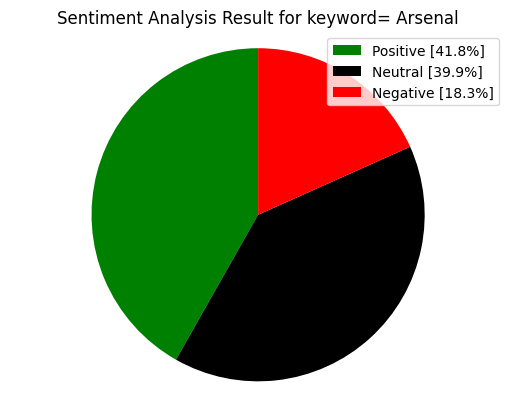

In [31]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive,neutral,negative]
colors = ['green','black','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+"Arsenal"+"" )
plt.axis('equal')
plt.show()

In [21]:
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["tweet"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["tweet"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["tweet"]]
df['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in df["tweet"]]
df.head()

,Unnamed: 0,username,tweet,likes_count,retweets_count,stopwords,Positive,Negative,Neutral,Compound
0,0,norudreamer,barakadavid wear arsenal shirt black pale ...,0,0,3,0.000,0.000,1.000,0.0000
1,1,sw6billy,imagine west ham win european cup arsenal s...,0,0,3,0.352,0.000,0.648,0.5859
2,2,telemundosports,bado de premierleague aston villa vs a...,0,0,0,0.000,0.000,1.000,0.0000
3,3,tom_yates91,cfnkingspeedy fozwrestle scjohnson thef l...,0,0,7,0.000,0.000,1.000,0.0000
4,4,lcfcvrp342,lcfcgeorgee good win good teams like liver...,0,0,5,0.565,0.107,0.327,0.8689


In [22]:
score = df["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df["Sentiment"] = sentiment
df.head()

,Unnamed: 0,username,tweet,likes_count,retweets_count,stopwords,Positive,Negative,Neutral,Compound,Sentiment
0,0,norudreamer,barakadavid wear arsenal shirt black pale ...,0,0,3,0.000,0.000,1.000,0.0000,Neutral
1,1,sw6billy,imagine west ham win european cup arsenal s...,0,0,3,0.352,0.000,0.648,0.5859,Positive
2,2,telemundosports,bado de premierleague aston villa vs a...,0,0,0,0.000,0.000,1.000,0.0000,Neutral
3,3,tom_yates91,cfnkingspeedy fozwrestle scjohnson thef l...,0,0,7,0.000,0.000,1.000,0.0000,Neutral
4,4,lcfcvrp342,lcfcgeorgee good win good teams like liver...,0,0,5,0.565,0.107,0.327,0.8689,Positive


In [23]:
df.columns

Index(['Unnamed: 0', 'username', 'tweet', 'likes_count', 'retweets_count',
       'stopwords', 'Positive', 'Negative', 'Neutral', 'Compound',
       'Sentiment'],
      dtype='object')

In [34]:
sentiment_df = pd.DataFrame(df, columns=["Sentiment","Compound", "tweet"])

sentiment_df.head(10)

,Sentiment,Compound,tweet
0,Neutral,0.0000,barakadavid wear arsenal shirt black pale ...
1,Positive,0.5859,imagine west ham win european cup arsenal s...
2,Neutral,0.0000,bado de premierleague aston villa vs a...
3,Neutral,0.0000,cfnkingspeedy fozwrestle scjohnson thef l...
4,Positive,0.8689,lcfcgeorgee good win good teams like liver...
5,Neutral,0.0000,deathrowadz arsenal
6,Negative,-0.7906,cadeyrnn imo probably get cuban missile cris...
7,Neutral,0.0000,ahmedmaq fxrxan opposed arsenal scored g...
8,Neutral,0.0000,alhamdhulillaah arsenal thomaspartey allah ...
9,Negative,-0.1134,mcfaul yamane patricia know answer questi...


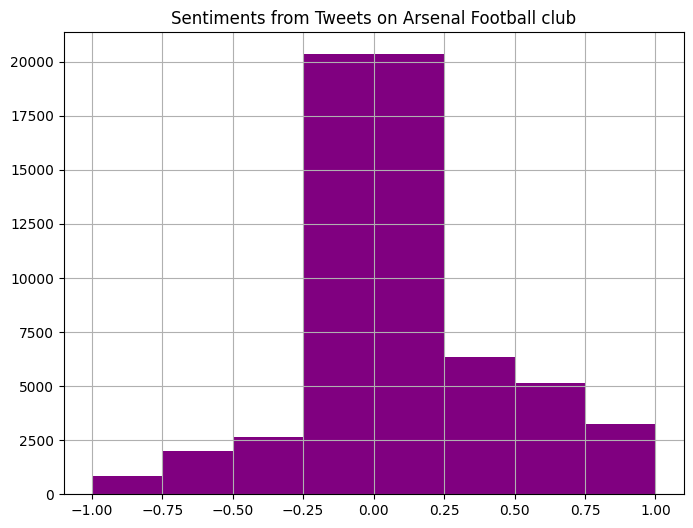

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Arsenal Football club")
plt.show()

In [26]:
sentiment_dfs = sentiment_df[sentiment_df.Compound != 0]

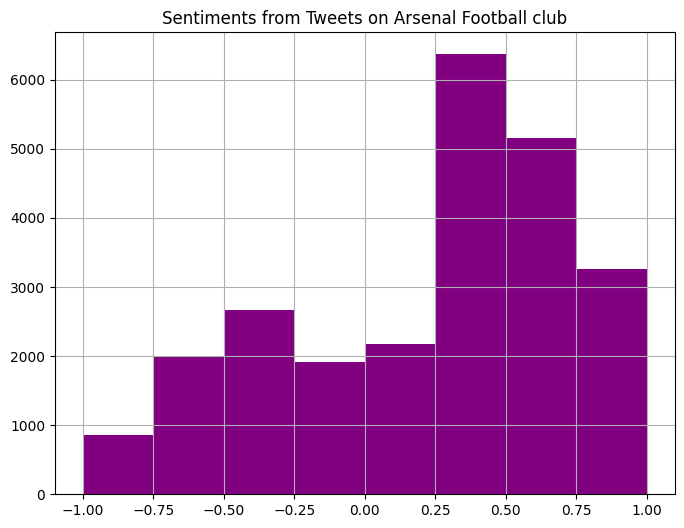

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_dfs.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Arsenal Football club")
plt.show()